In [1]:
#https://www.kaggle.com/rahulstephenites2/airline-flight-delaytime-prediction
#https://www.kaggle.com/usdot/flight-delays/kernels

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

import datetime
import time
from time import strftime, gmtime

import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
df_flights=pd.read_csv('flightDataBINARY.csv')

In [4]:
df_flights = df_flights.fillna({'CARRIER_DELAY': 0})
df_flights = df_flights.fillna({'DEP_DELAY': 0})
df_flights = df_flights.fillna({'WEATHER_DELAY': 0})
df_flights = df_flights.fillna({'NAS_DELAY': 0})
df_flights = df_flights.fillna({'SECURITY_DELAY': 0})
df_flights = df_flights.fillna({'LATE_AIRCRAFT_DELAY': 0})
df_flights = df_flights.fillna({'CANCELLATION_CODE': 0})
df_flights = df_flights.fillna({'N6_DELAY': 0})

In [5]:
df_flights.isnull().values.any()

False

In [6]:
#df_airlines = pd.read_csv('airlinesBINARY.csv')
#abbr_companies = airlines_names.set_index('OP_UNIQUE_CARRIER')['AIRLINE'].to_dict()
#df_airlines

In [7]:
# Marking the delayed flights
df_flights['DELAYED'] = df_flights.loc[:,'DEP_DELAY'].values > 0
df_flights['AIRLINE'] = df_flights.loc[:,'OP_UNIQUE_CARRIER']

In [8]:
airlines_names = pd.read_csv('airlinesBINARY.csv')
abbr_companies = airlines_names.set_index('OP_UNIQUE_CARRIER')['AIRLINE'].to_dict()

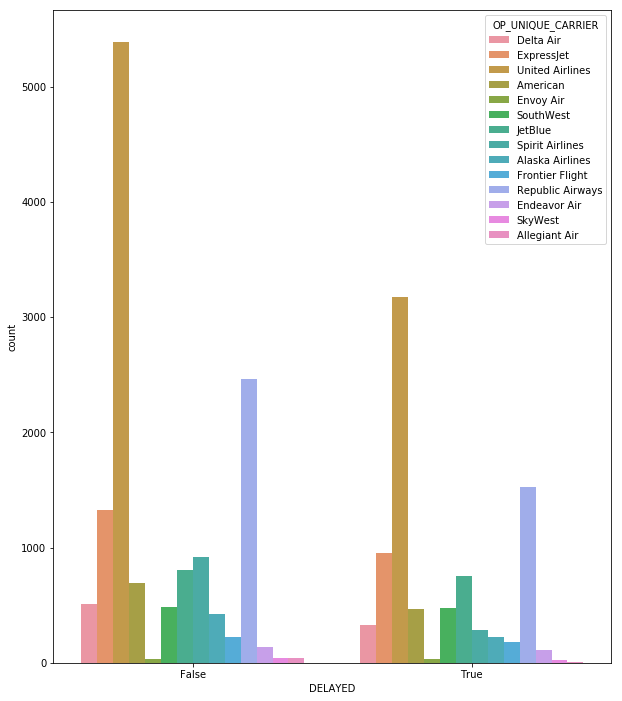

In [9]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue=df_flights['OP_UNIQUE_CARRIER'].replace(abbr_companies),data=df_flights)
plt.show()

FEATURE SELECTION

In [10]:
# Label definition
y = df_flights.DELAYED

# Choosing the predictors
feature_list_s = [
    'LATE_AIRCRAFT_DELAY'
    ,'CARRIER_DELAY'
    #,'NAS_DELAY'
    ,'WEATHER_DELAY'
    , 'SECURITY_DELAY']

# New dataframe based on a small feature list
X_small = df_flights[feature_list_s]

In [11]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
clf = RandomForestClassifier(n_estimators = 10, random_state=32) 
clf.fit(X_small, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [12]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_small.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0.628741
1,CARRIER_DELAY,0.330953
2,WEATHER_DELAY,0.0393046
3,SECURITY_DELAY,0.00100193


NAS delay has the greatest impact on a delated flight

In [13]:
# choosing the predictors
testing_feature_list = [
    'DAY_OF_MONTH'
    ,'AIRLINE'
    ,'OP_CARRIER_FL_NUM'
    #,'ORIGIN'
    #,'NAS_DELAY'
]

In [14]:
# choosing the predictors
feature_list = [
    'DAY_OF_MONTH'
    ,'OP_UNIQUE_CARRIER'
    ,'OP_CARRIER_FL_NUM'
    #,'ORIGIN'
    #,'NAS_DELAY'
]
# Any number can be used in place of '0'. 
import random
random.seed(0)
    
df_flights_1=df_flights.sample(n=10000)


In [15]:
#X.info()

In [16]:
y = df_flights_1.DELAYED
X = df_flights_1[feature_list]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.


In [18]:
model=LinearRegression()
model=model.fit(X_train,y_train)
slope=model.coef_
coef=model.intercept_
print(slope.flatten())
print(coef)

[ 0.01765323 -0.01622585  0.01469807]
0.381625


In [19]:
y_pred=model.predict(X_train)

In [20]:
r2_score(y_train,y_pred)

0.0032240124091393874

Stepwise Regression is where we select the features to be used in a model on the basis of variable importance.

Variables are sequentially selected and a model is built starting with one variable. In the next model another variable is added and the adjusted R2 for both the models are compared. If the adjusted R2 increases the next variable is added. This process is repeated till there is a decrease in the adjusted R2 The above process is known as forward selection.

In [21]:
from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree

In [22]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor()
    ]

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,auc

In [24]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
results=[]

row_index = 0
for alg in MLA:
    
    cv_results = cross_val_score(alg, X_train, y_train, cv=10)
    results.append(cv_results)
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/nbuser/anaconda3_501/l

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA AUC
3,GradientBoostingRegressor,0.1100,0.0361,0.625101
0,AdaBoostRegressor,0.0309,0.0086,0.573064
5,KNeighborsRegressor,0.2858,-0.0981,0.588046
4,RandomForestRegressor,0.7970,-0.2597,0.576097
1,BaggingRegressor,0.7948,-0.2624,0.570383
2,ExtraTreesRegressor,0.9854,-0.3352,0.571662
6,DecisionTreeRegressor,0.9854,-0.7982,0.544703
7,ExtraTreeRegressor,0.9854,-0.8216,0.544036


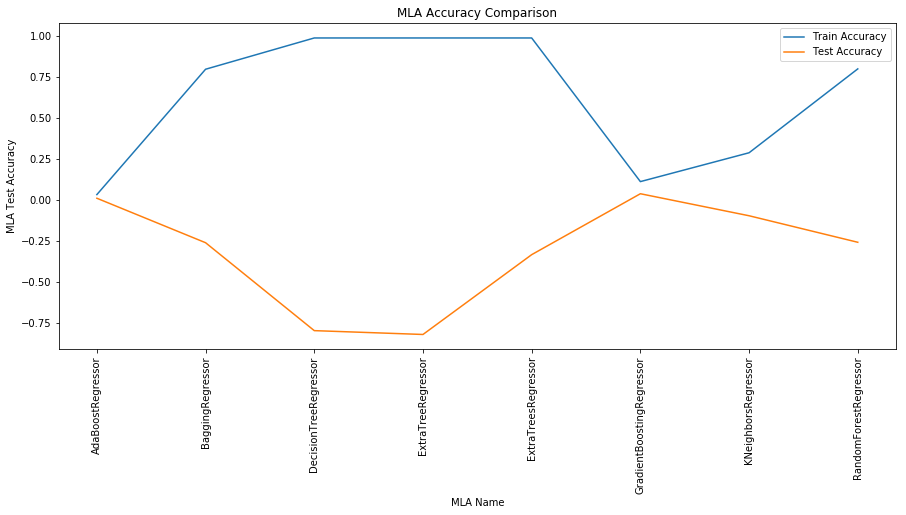

In [25]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

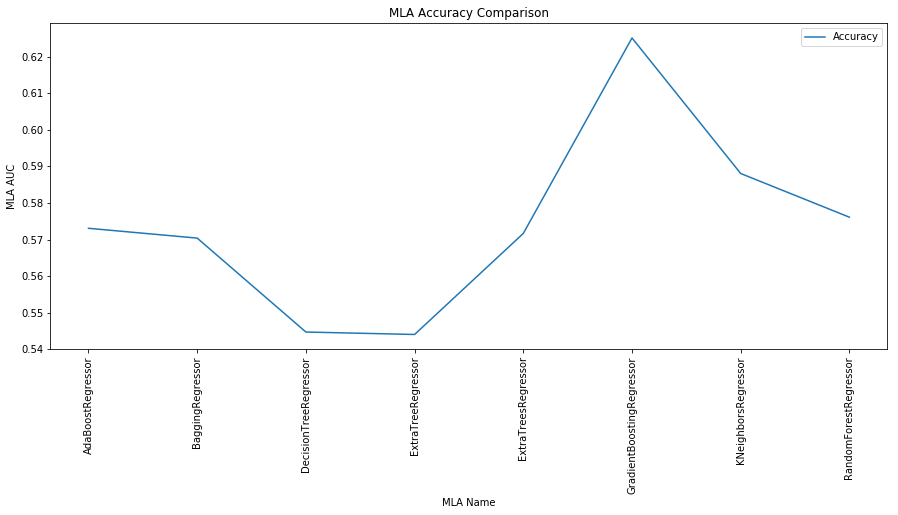

In [26]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',label='Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

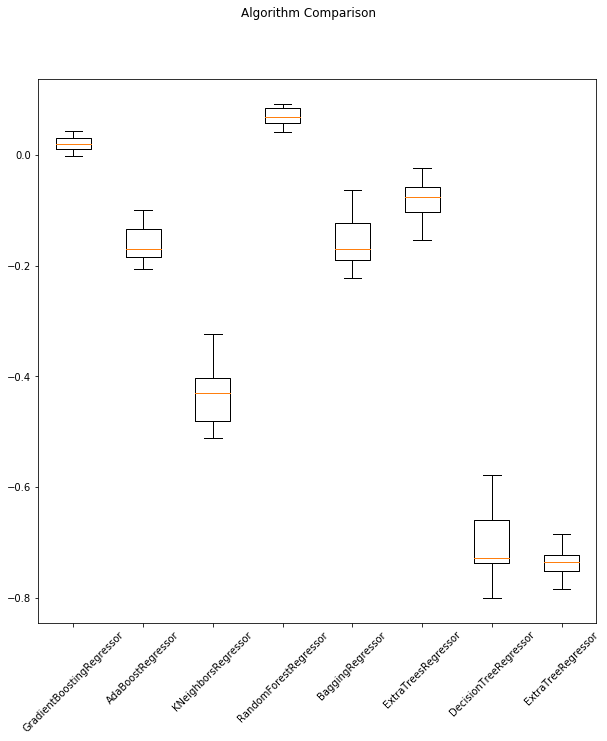

In [27]:
#sns.boxplot(MLA_compare["MLA AUC"])# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,labels=MLA_compare['MLA Name'])
plt.xticks(rotation=45)
plt.show()

**Data Prediction**
Preparing the Prediction
Building the Model First
I am building the model first. Here I am choosing 100 trees for the model to not overexert the computation time in later purpose.

In [28]:
# RandomForest with 100 trees
forest_model = RandomForestRegressor(n_estimators = 100, random_state=42)


In [29]:
y = df_flights_1.DEP_DELAY
y = np.array(y)

In [30]:
X = np.array(X)

In [31]:

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [32]:
#The Shape of Train- and Testdata
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', val_X.shape)
print('Testing Labels Shape:', val_y.shape)

Training Features Shape: (7000, 3)
Training Labels Shape: (7000,)
Testing Features Shape: (3000, 3)
Testing Labels Shape: (3000,)


In [33]:
# Average arrival delay for our dataset
baseline_preds = df_flights['DEP_DELAY'].agg('sum') / df_flights['DEP_DELAY'].agg('count') 

# Baseline error by average arrival delay 
baseline_errors = abs(baseline_preds - val_y)
print('Average baseline error: ', round(np.mean(baseline_errors),2))

Average baseline error:  33.22


This is our average baseline error of 30.73 minutes of delays we want to beat with our regression model.

In [34]:
# Fit the model
forest_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# Predict the target based on testdata 
flightdelay_pred= forest_model.predict(val_X)

#Calculate the absolute errors
errors_random1 = abs(flightdelay_pred - val_y)

print('Mean Absolute Error: ', round(np.mean(errors_random1),3), 'minutes.')

Mean Absolute Error:  31.802 minutes.


**Validate and Visualize the Model**
In this chapter, I will validate and visualize the prediction model. The previous mentioned mean absolute error of 0.857 minute seems to be a quite good prediction of the arrival delay. The predictions are on average around 0.857 minutes away from the real value. This is a really exact prediction. It is mandatory to check the model whether it is an overfitted one or not.

The previously shown feature importance of the model looks like this:

In [36]:
X=pd.DataFrame(X)

importances=forest_model.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,0.0,0.212040
1,1.0,0.054052
2,2.0,0.733908


In [37]:
# Count of DEPARTURE_DELAYs that are not zero and could influence our prediction.
print("DEPARTURE_DELAY count: ")
print(df_flights_1[df_flights_1['DEP_DELAY'] != 0]['DEP_DELAY'].count())
print("-------------------------------")
print("All datarow count:")
print((df_flights_1)['DEP_DELAY'].count())
print("-------------------------------")
print("-------------------------------")
print("Percentage of DEPARTURE_DELAY that is not zero:")
print(df_flights_1[df_flights_1['DEP_DELAY'] != 0]['DEP_DELAY'].count() / df_flights_1['DEP_DELAY'].count())

DEPARTURE_DELAY count: 
9435
-------------------------------
All datarow count:
10000
-------------------------------
-------------------------------
Percentage of DEPARTURE_DELAY that is not zero:
0.9435


**The Coefficient of Determination - The Model Fitness**
In this chapter, I will calculate the coefficient of determination or "R-squared" for the model. It will show how good the inputs fit the output of the model, or how good the model represents the underlying data. That means if the regressions of our features have an R-squared close to 1, it means that the independent variables (the features) are well-suited to predict the dependent variable (our target, the ARRIVAL_DELAY).

I will now calculate the R-squared for the built model based on the training and test dataset:

In [38]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",forest_model.score(train_X, train_y))
print("------------------- TEST --------------------------")
print("r-squared score: ", forest_model.score(val_X, val_y))

----------------- TRAINING ------------------------
r-squared score:  0.8304987923358857
------------------- TEST --------------------------
r-squared score:  -0.03794454474380626


This here seems to be as well pretty accurate. The training dataset is a known dataset by the model why the test dataset is used as well here. As we know due to the previous analysis, the model is highly based on the DEPARTURE_DELAY feature. All the model's decision is based on what the DEPARTURE_DELAY does, which afterward leads to that accuracy.

I will test the model with another new dataset and calculate the necessary key figures.

In [39]:
#NEW DATA

In [40]:
random.seed(1)
df_flights__2=df_flights.sample(n=500)
X2 = df_flights__2[feature_list]
y2 = df_flights__2.DEP_DELAY

In [41]:
# Predict the new data based on the old model (forest_model)
flightdelay_pred_ = forest_model.predict(X2)

#Calculate the absolute errors
errors_random_2 = abs(flightdelay_pred_ - y2)

In [42]:
# Mean Absolute Error im comparison
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random1),3), 'minutes.')
print('---------------------------------------------------------------')
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random_2),3), 'minutes.')

Mean Absolute Error Random Sample 1:  31.802 minutes.
---------------------------------------------------------------
Mean Absolute Error Random Sample 1:  28.268 minutes.


In [43]:
print("r-squared score Random Sample 1: ",forest_model.score(val_X, val_y))
print("------------------- TEST --------------------------")
print("r-squared score Random Sample 2: ", forest_model.score(X2, y2))

r-squared score Random Sample 1:  -0.03794454474380626
------------------- TEST --------------------------
r-squared score Random Sample 2:  0.039761705866746544


In [44]:
a=df_flights__2

In [45]:
# Look into the flight 
a.iloc[50]

DAY_OF_MONTH             21
OP_UNIQUE_CARRIER         7
OP_CARRIER_FL_NUM      2442
ORIGIN                  EWR
DEST                    ATL
DEP_DELAY               183
CANCELLED                 0
CARRIER_DELAY             0
WEATHER_DELAY            10
N6_DELAY                  0
SECURITY_DELAY            0
LATE_AIRCRAFT_DELAY     154
DELAYED                True
AIRLINE                   7
Name: 14301, dtype: object

In [46]:
# Retrieving the flight with index 3221210 (delayed flight without departure delay).
X3 = a.loc[:,feature_list]
X3 = X3.iloc[50]
# Setting the target for our flight index 3221210
y3 =a.iloc[50]['DEP_DELAY']
print(y3)
X3

183.0


DAY_OF_MONTH           21
OP_UNIQUE_CARRIER       7
OP_CARRIER_FL_NUM    2442
Name: 14301, dtype: int64

In [47]:
# Printing the important stuff
flight_pred_s = forest_model.predict([X3])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y3)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y3-flight_pred_s)

Predicted Delay of the Flight (Minutes):  [135.56]
-------------------------------------------------
Original Delay of the Flight (Minutes):   183.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [47.44]


In [48]:
#Testing something else

#y = df_flights.DELAYED
#X = df_flights_1[feature_list]

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#from sklearn.preprocessing import scale
#X_train=scale(X_train)
#X_test=scale(X_test)

In [49]:
#Following on from above - trying to get a graph

#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))

#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

#plt.show()

# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
#X_grid = np.arange(min(train_X), max(train_X), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(train_X, train_y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()


In [50]:
#ATTEMPT AT KN

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
# RandomForest with 100 trees
neighbours_model = KNeighborsRegressor(n_neighbors = 7)

In [53]:
# Fit the model

neighbours_model.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [54]:
# Predict the target based on testdata 
flightdelay_pred2= neighbours_model.predict(val_X)

In [55]:
#Calculate the absolute errors
errors_random2 = abs(flightdelay_pred2 - val_y)

In [56]:
print('Mean Absolute Error: ', round(np.mean(errors_random2),3), 'minutes.')

Mean Absolute Error:  31.883 minutes.


In [57]:
X=pd.DataFrame(X)

In [58]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",neighbours_model.score(train_X, train_y))
print("------------------- TEST --------------------------")
print("r-squared score: ", neighbours_model.score(val_X, val_y))

----------------- TRAINING ------------------------
r-squared score:  0.20876484971478448
------------------- TEST --------------------------
r-squared score:  -0.011687740941832335


In [59]:
#NEW DATA

random.seed(1)
df_flights__3=df_flights.sample(n=500) 
X4 = df_flights__3[feature_list]
y4 = df_flights__3.DEP_DELAY

# Predict the new data based on the old model (forest_model)
flightdelay_pred_2 = neighbours_model.predict(X4)

#Calculate the absolute errors
errors_random_3 = abs(flightdelay_pred_2 - y4)

# Mean Absolute Error im comparison
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random1),3), 'minutes.')
print('---------------------------------------------------------------')
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random_2),3), 'minutes.')
X=pd.DataFrame(X)
print("r-squared score Random Sample 1: ",neighbours_model.score(val_X, val_y))
print("------------------- TEST --------------------------")
print("r-squared score Random Sample 2: ", neighbours_model.score(X4, y4))

Mean Absolute Error Random Sample 1:  31.802 minutes.
---------------------------------------------------------------
Mean Absolute Error Random Sample 1:  28.268 minutes.
r-squared score Random Sample 1:  -0.011687740941832335
------------------- TEST --------------------------
r-squared score Random Sample 2:  0.10481114001912739


In [60]:
a=df_flights__3
a.iloc[388]

DAY_OF_MONTH             25
OP_UNIQUE_CARRIER        13
OP_CARRIER_FL_NUM      3418
ORIGIN                  EWR
DEST                    DTW
DEP_DELAY                29
CANCELLED                 0
CARRIER_DELAY             0
WEATHER_DELAY             0
N6_DELAY                  0
SECURITY_DELAY            0
LATE_AIRCRAFT_DELAY       0
DELAYED                True
AIRLINE                  13
Name: 17391, dtype: object

In [61]:

X5 = a.loc[:,feature_list]
X5 = X5.iloc[50]
# Setting the target for our flight index 3221210
y5 =a.iloc[50]['DEP_DELAY']
print(y5)
X5

# Printing the important stuff
flight_pred_s = neighbours_model.predict([X5])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y5)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y5-flight_pred_s)

258.0
Predicted Delay of the Flight (Minutes):  [27.14285714]
-------------------------------------------------
Original Delay of the Flight (Minutes):   258.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [230.85714286]


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [63]:
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 49


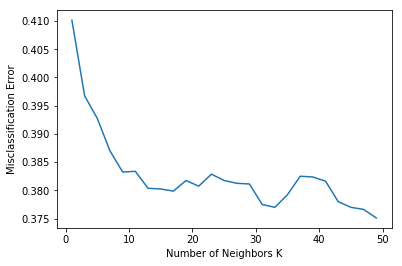

In [64]:
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [65]:
#ATTEMPT AT DECSION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor

In [66]:
# RandomForest with 100 trees
tree_model = DecisionTreeRegressor(random_state = 0)

In [67]:
# Fit the model
tree_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [68]:
# Predict the target based on testdata 
flightdelay_pred3= tree_model.predict(val_X)

In [69]:
#Calculate the absolute errors
errors_random3 = abs(flightdelay_pred3 - val_y)

In [70]:
print('Mean Absolute Error: ', round(np.mean(errors_random2),3), 'minutes.')

Mean Absolute Error:  31.883 minutes.


In [71]:
X=pd.DataFrame(X)

In [72]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",tree_model.score(train_X, train_y))
print("------------------- TEST --------------------------")
print("r-squared score: ", tree_model.score(val_X, val_y))

----------------- TRAINING ------------------------
r-squared score:  0.9951806615151617
------------------- TEST --------------------------
r-squared score:  -0.5093187466338476


In [73]:
#NEW DATA

random.seed(1)
df_flights__4=df_flights.sample(n=10000) #WAS 500!!!
X6 = df_flights__4[feature_list]
y6 = df_flights__4.DEP_DELAY

# Predict the new data based on the old model
flightdelay_pred_3 = tree_model.predict(X6)

#Calculate the absolute errors
errors_random_3 = abs(flightdelay_pred_3 - y6)

# Mean Absolute Error im comparison
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random1),3), 'minutes.')
print('---------------------------------------------------------------')
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random_2),3), 'minutes.')
X=pd.DataFrame(X)
print("r-squared score Random Sample 1: ",tree_model.score(val_X, val_y))
print("------------------- TEST --------------------------")
print("r-squared score Random Sample 2: ", tree_model.score(X6, y6))

Mean Absolute Error Random Sample 1:  31.802 minutes.
---------------------------------------------------------------
Mean Absolute Error Random Sample 1:  28.268 minutes.
r-squared score Random Sample 1:  -0.5093187466338476
------------------- TEST --------------------------
r-squared score Random Sample 2:  -0.39818054597033115


In [74]:
a=df_flights__4
a.iloc[90]

DAY_OF_MONTH              25
OP_UNIQUE_CARRIER         10
OP_CARRIER_FL_NUM       1146
ORIGIN                   EWR
DEST                     ATL
DEP_DELAY                -15
CANCELLED                  0
CARRIER_DELAY              0
WEATHER_DELAY              0
N6_DELAY                   0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
DELAYED                False
AIRLINE                   10
Name: 17591, dtype: object

In [75]:

X7 = a.loc[:,feature_list]
X7 = X7.iloc[900]
y7 =a.iloc[900]['DEP_DELAY']


# Printing the important info
flight_pred_s = tree_model.predict([X7])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y7)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y7-flight_pred_s)

Predicted Delay of the Flight (Minutes):  [-3.]
-------------------------------------------------
Original Delay of the Flight (Minutes):   -3.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [0.]


In [76]:
count = 0
for x in range(10000):
    a.iloc[x]
    X = a.loc[:,feature_list]
    X = X.iloc[x]
    y =a.iloc[x]['DEP_DELAY']
    flight_pred_s = tree_model.predict([X])
    count += y-flight_pred_s


In [77]:
print(count / 10000)

[-1.09825]


In [78]:
a.count()

DAY_OF_MONTH           10000
OP_UNIQUE_CARRIER      10000
OP_CARRIER_FL_NUM      10000
ORIGIN                 10000
DEST                   10000
DEP_DELAY              10000
CANCELLED              10000
CARRIER_DELAY          10000
WEATHER_DELAY          10000
N6_DELAY               10000
SECURITY_DELAY         10000
LATE_AIRCRAFT_DELAY    10000
DELAYED                10000
AIRLINE                10000
dtype: int64

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [80]:
#be able to put in values and predict the delay based on them


X4 = a.loc[:,feature_list]
X4= X4.iloc[1]   
#X4 = [9, 13, 3420]
# Setting the target for our flight index 3221210
y4 = a.iloc[1]['DEP_DELAY']
#y4 = 8
#print(y4)
X4

# Printing the important stuff
flight_pred_s = tree_model.predict([X4])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y4)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y4-flight_pred_s)

Predicted Delay of the Flight (Minutes):  [-10.]
-------------------------------------------------
Original Delay of the Flight (Minutes):   -10.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [0.]


In [81]:
X4 = a.loc[:,feature_list]
X4 = 2,15,576
# Setting the target for our flight index 3221210
#y4 =12
#print(y4)
X4


(2, 15, 576)

In [82]:
X4 = a.loc[:,feature_list]
X4 = X4.iloc[1]
X4

DAY_OF_MONTH            7
OP_UNIQUE_CARRIER      13
OP_CARRIER_FL_NUM    3451
Name: 4801, dtype: int64

In [83]:
a.loc[6271]

KeyError: 'the label [6271] is not in the [index]'

In [ ]:
#Enter own values of possible flight

flightNum = 324
dayOfMonth = 1
carrier = 9
  
X4 = [dayOfMonth, carrier, flightNum]

flight_pred_s = tree_model.predict([X4])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)



In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit(['OP_UNIQUE_CARRIER']);


In [ ]:
newData=pd.read_csv('2017Data.csv')

In [ ]:
count = 0
for x in range(10000):
    newData.iloc[x]
    X = newData.loc[:,feature_list]
    X = X.iloc[x]
    y =newData.iloc[x]['DEP_DELAY']
    flight_pred_s = tree_model.predict([X])
    count += y-flight_pred_s

In [ ]:
newData.isnull().values.any()